## Using Python to Map of the Impacts of Geology and Fluvial Processes on the Development of Drainage Networks on Mars
### Principles of Geocomputing 5561

> The synopsis of this project is to map out linear geological features (ligaments) on the surface of Mars to show evidence of past fluvial/drainage activity (with some emphasis on Valles Marineris and Olympus Mons).  Using original Mars DEMs and three raster analytic layers, to find evidence; these include: watershed, hillshade, and slope, there is substantial geological evidence that these networks determined the fluvial processes. Having performed the digitization and analysis in ArcMap for a prior undergraduate project, the goal here is to simply automate the maps with Python and visualize them.  The whole project itself utilized statistical analysis in simulating three-dimensional imagery, calculating indices, and assessing differences in terrain, atmospheric pressure, oxidation, and night/day cycles.  In conjunction with Earth-Sciences Department  at Bemidji State University. 

> Alexander Danielson danie861

In [1]:
import rasterio #Open imagery to be displayed
import numpy as np #Allows for arrays and matrices
import matplotlib.pyplot as plt #Allows to plot the raster/tif files
import geopandas #Display the rows and columns in the shapefiles
import matplotlib as mpl
import geopandas as gpd #Plot out geological linear features
from rasterio.plot import plotting_extent #Sets the plotting extent of geological linear features
from matplotlib.colors import BoundaryNorm, LinearSegmentedColormap 
import numpy as np



mars = rasterio.open('Mars_MGS_MOLA_Shade_global_463m.tif') #Opens Mars imagery from NASA
watershed = rasterio.open('Watersh_Flow12.tif') #Watersheds of Mars to delinate areas of interests
slopemars = rasterio.open('slopemars1.tif') #Slope for steepness of terrain
hillshade = rasterio.open('hillelemars1.tif') #Hillshade for downhill direction of terrain
ligament = ('Ligament_Lines.shp') #Assigned ligaments
slopelinear = ('SlopeLinear.shp')
hillshadeline = ('HillshadeLinear.shp')

mars = mars.read() #Assigned variables to map
watershed = watershed.read()
slopemars = slopemars.read()
hillshade = hillshade.read()

print(mars.shape) #Prints out the dimensions of the Mars DEM
print(np.amin(mars[0]))
print(np.amax(mars[0]))
print(np.amax(mars[0]) + abs(np.amin(mars[0])))

print(watershed.shape) #Prints out the dimensions of the Mars Watershed
print(np.amin(watershed[0]))
print(np.amax(watershed[0]))
print(np.amax(watershed[0]) + abs(np.amin(watershed[0])))

print(slopemars.shape) #Prints out the dimensions of the Mars Tharsis Area via Slope 
print(np.amin(slopemars[0]))
print(np.amax(slopemars[0]))
print(np.amax(slopemars[0]) + abs(np.amin(slopemars[0])))

print(hillshade.shape) #Prints out the dimensions of the Mars Tharsis Area via Hillshade
print(np.amin(hillshade[0]))
print(np.amax(hillshade[0]))
print(np.amax(hillshade[0]) + abs(np.amin(hillshade[0])))

(1, 22528, 46080)
0
254
254
(3, 10433, 21339)
0
255
255
(1, 12346, 14529)
0.0
79.75194
79.75194
(1, 12346, 14529)
0
255
255


In [3]:
# Reads the shapefiles for the geological features to be displayed
gdfligament = gpd.read_file('Ligament_Lines.shp')
gdfhillshade = gpd.read_file('HillshadeLinear.shp')
gdfslope = gpd.read_file('SlopeLinear.shp')

In [ ]:
from matplotlib.colors import BoundaryNorm, LinearSegmentedColormap #Maps the raster layer of Mars as an overview of study area


custom_cmap = LinearSegmentedColormap.from_list('mars', ['#162252', #Creates a colored map of raster
                                                         '#104E8B',
                                                         '#00B2EE',
                                                         '#00FF00',
                                                         '#FFFF00',
                                                         '#FFA500',
                                                         '#FF0000',
                                                         '#8b0000',
                                                         '#964B00',
                                                         '#808080',
                                                         '#FFFFFF'], N=2221)

bounds = np.arange(-8210, 14000, 10) #Sets boundaries for raster
norm = BoundaryNorm(bounds, custom_cmap.N)

fig, ax = plt.subplots() #Makes subplots of area
fig.set_size_inches(14, 7)

ax.imshow(mars[0], cmap=custom_cmap) #Shows assigned color map of Mars
ax.axis('off')
newax = fig.add_axes([0.82, 0.13, 0.08, 0.08], anchor='NE')
newax.axis('off')
plt.show()

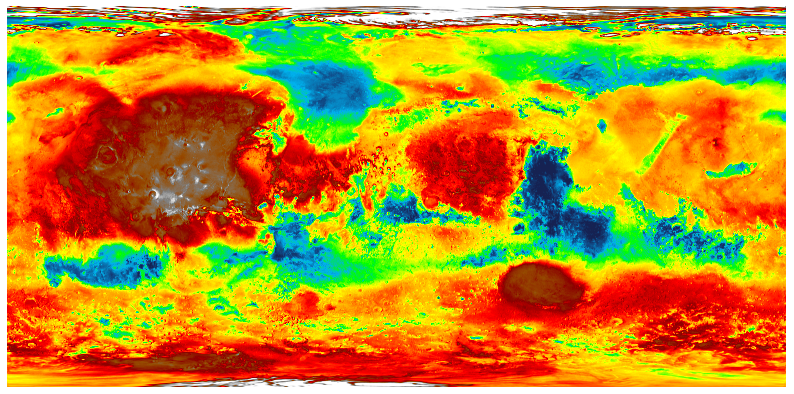

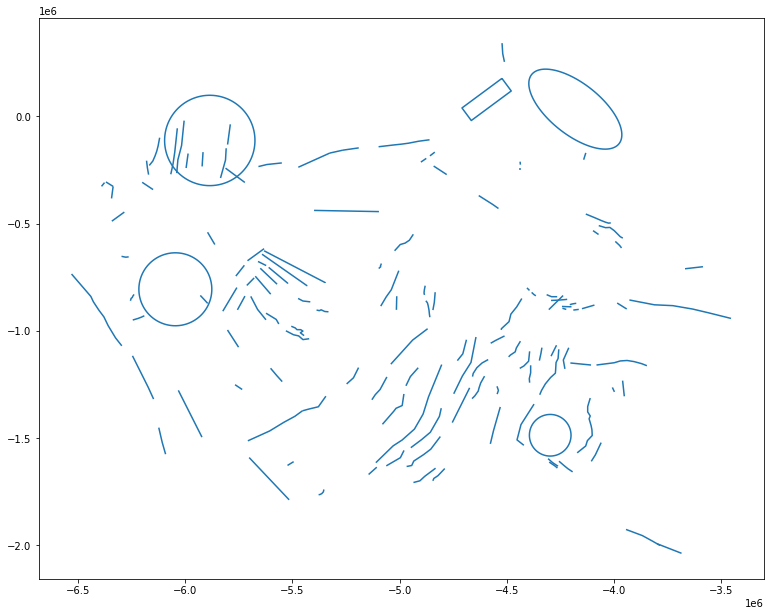

In [5]:
from matplotlib.colors import BoundaryNorm, LinearSegmentedColormap



custom_cmap = LinearSegmentedColormap.from_list('watershed', ['#162252', #Shows watersheds to grasp drainage basin origins
                                                         '#104E8B',
                                                         '#00B2EE',
                                                         '#00FF00',
                                                         '#FFFF00',
                                                         '#FFA500',
                                                         '#FF0000',
                                                         '#8b0000',
                                                         '#964B00',
                                                         '#808080',
                                                         '#FFFFFF'], N=2221)

bounds = np.arange(-8210, 14000, 10)
norm = BoundaryNorm(bounds, custom_cmap.N)

fig, ax = plt.subplots()
fig.set_size_inches(14, 7)

ax.imshow(watershed[0], cmap=custom_cmap)
ax.axis('off')
newax = fig.add_axes([0.82, 0.13, 0.08, 0.08], anchor='NE')
newax.axis('off')
gdfligament.plot(figsize = (13, 15)) #Creates plot of geological linear feature for idea of geological conformitiy 
plt.show()

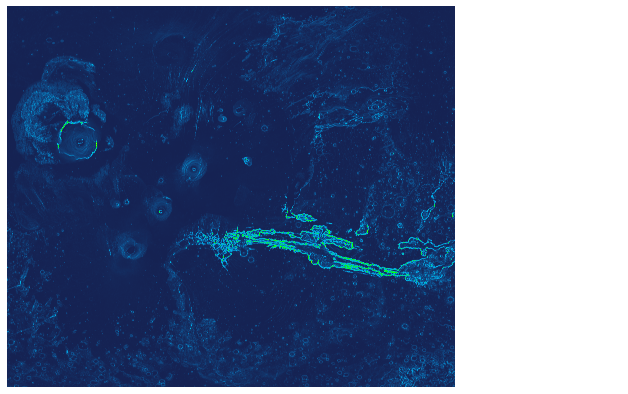

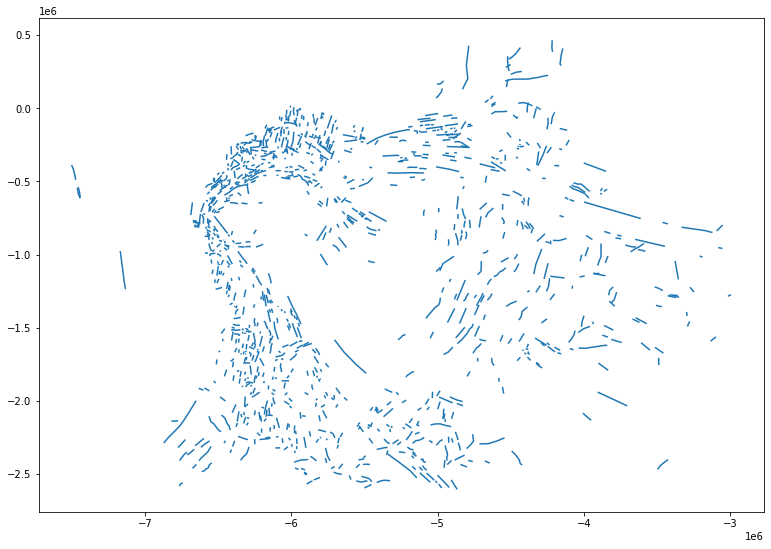

In [40]:
from matplotlib.colors import BoundaryNorm, LinearSegmentedColormap


custom_cmap = LinearSegmentedColormap.from_list('slopemars', ['#162252',
                                                         '#104E8B',
                                                         '#00B2EE',
                                                         '#00FF00',
                                                         '#FFFF00',
                                                         '#FFA500',
                                                         '#FF0000',
                                                         '#8b0000',
                                                         '#964B00',
                                                         '#808080',
                                                         '#FFFFFF'], N=2221)

bounds = np.arange(-8210, 14000, 10)
norm = BoundaryNorm(bounds, custom_cmap.N)

fig, ax = plt.subplots()
fig.set_size_inches(14, 7)

ax.imshow(slopemars[0], cmap=custom_cmap)
ax.axis('off')
newax = fig.add_axes([0.82, 0.13, 0.08, 0.08], anchor='NE')
newax.axis('off')
gdfslope.plot(figsize = (13, 15)) #Displays slope geological linear features along slope imagery
plt.show()

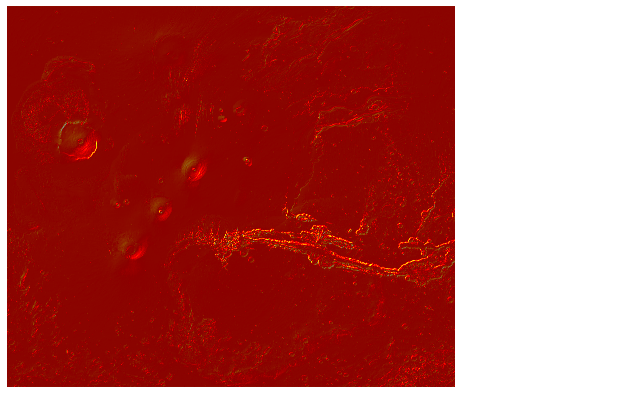

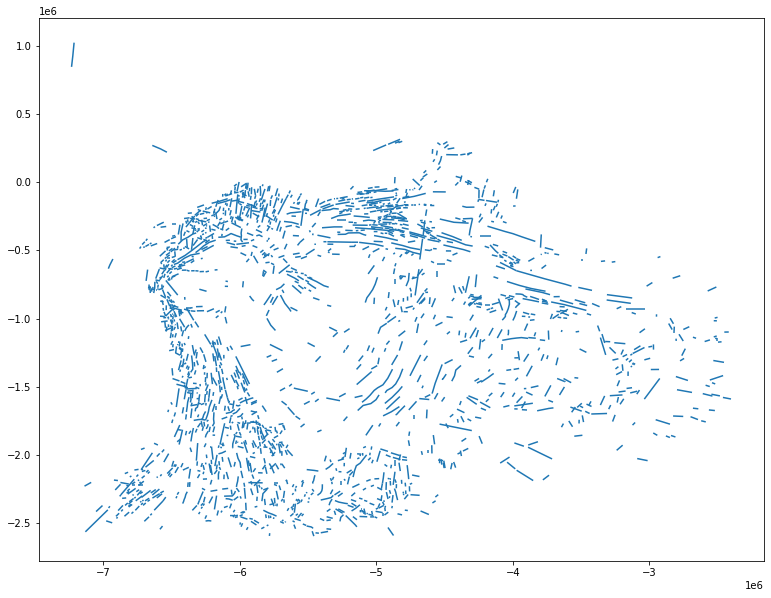

In [33]:
from matplotlib.colors import BoundaryNorm, LinearSegmentedColormap


custom_cmap = LinearSegmentedColormap.from_list('hillshade', ['#162252',
                                                         '#104E8B',
                                                         '#00B2EE',
                                                         '#00FF00',
                                                         '#FFFF00',
                                                         '#FFA500',
                                                         '#FF0000',
                                                         '#8b0000',
                                                         '#964B00',
                                                         '#808080',
                                                         '#FFFFFF'], N=2221)

bounds = np.arange(-8210, 14000, 10)
norm = BoundaryNorm(bounds, custom_cmap.N)

fig, ax = plt.subplots()
fig.set_size_inches(14, 7)

ax.imshow(hillshade[0], cmap=custom_cmap)
ax.axis('off')
newax = fig.add_axes([0.82, 0.13, 0.08, 0.08], anchor='NE')
newax.axis('off')
gdfhillshade.plot(figsize = (13, 15)) #Displays hillshade geological linear features along hillshade imagery
plt.show()

In [17]:
gdf['geometry'] #Displays feature lengths 

0      LINESTRING (-5632036.220 -627135.050, -5347343...
1      LINESTRING (-5641561.239 -643010.081, -5433069...
2      LINESTRING (-5660346.694 -676876.816, -5622246...
3      LINESTRING (-5824388.688 -908652.279, -5758771...
4      LINESTRING (-5649763.339 -708626.879, -5571446...
                             ...                        
126    LINESTRING (-4546236.965 -1258791.539, -453962...
127    LINESTRING (-4298189.594 -1390021.886, -429791...
128    LINESTRING (-4257179.096 -1608042.237, -423336...
129    LINESTRING (-4302819.812 -1612010.995, -427636...
130    LINESTRING (-4308111.489 -1596135.963, -428694...
Name: geometry, Length: 131, dtype: geometry

In [14]:
gdf.dtypes #Data type of ligaments

Id             int64
geometry    geometry
dtype: object

In [18]:
gdf[2:5]

,Id,geometry
2,0,"LINESTRING (-5660346.694 -676876.816, -5622246..."
3,0,"LINESTRING (-5824388.688 -908652.279, -5758771..."
4,0,"LINESTRING (-5649763.339 -708626.879, -5571446..."


In [7]:
colors_undersea = plt.cm.ocean(np.linspace(0.2, 0.8, 821)) #Assigns variables to be plotted in next cell
undersea_map = LinearSegmentedColormap.from_list('mars', colors_undersea, N=821)

colors_land = plt.cm.terrain(np.linspace(0.25, 1, 1400))
land_map = LinearSegmentedColormap.from_list('watershed', colors_land, N=1400)

colors = np.vstack((colors_undersea, colors_land))
terrain_map = LinearSegmentedColormap.from_list('hillshade', colors, N=2221)

bounds = np.arange(-8210, 14000, 10)
norm = BoundaryNorm(bounds, terrain_map.N)
plt.show()

NameError: name 'plt' is not defined

In [8]:
def change_sea_level(new_sea_level): #Shows a colormap for Mars to delienate the differences in surface depth from the dervived DEM products
    new_sea_level = new_sea_level / 10
    undersea = int(800 + new_sea_level)
    land = int(1400 - new_sea_level)
    colors_undersea = plt.cm.ocean(np.linspace(0.2, 0.8, undersea)) #Based on ocean depth
    undersea_map = LinearSegmentedColormap.from_list('watershed', colors_undersea, N=undersea)

    colors_land = plt.cm.terrain(np.linspace(0.25, 1, land)) #Based on land surface
    land_map = LinearSegmentedColormap.from_list('mars', colors_land, N=land)

    colors = np.vstack((colors_undersea, colors_land)) #Based on terrian/angles
    terrain_map = LinearSegmentedColormap.from_list('slopemars', colors, N=2221)

    bounds = np.arange(-8210, 14000, 10)
    norm = BoundaryNorm(bounds, terrain_map.N)
    return terrain_map, norm


terrain_map0, norm0 = change_sea_level(new_sea_level = 0)
terrain_map3000, norm3000 = change_sea_level(new_sea_level = 3000)
terrain_map_3000, norm_3000 = change_sea_level(new_sea_level = -3000)
plt.show()

NameError: name 'plt' is not defined

In [9]:
terrain_map1500, norm1500 = change_sea_level(new_sea_level = 1500) #Plotting Mars Terrain Map to overlay layers in previous cells

fig, ax = plt.subplots()
fig.set_size_inches(14, 7)

ax.imshow(mars[0], cmap=terrain_map1500, norm=norm1500)
ax.axis('off')
newax = fig.add_axes([0.82, 0.13, 0.08, 0.08], anchor='NE')
newax.axis('off')

plt.show()

NameError: name 'plt' is not defined

In [5]:
pip install earthpy #Attempt to use a different Python package by clipping the vector features to the raster images, but the CRS are different.

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install rioxarray #Attempt to use a different Python package clip the vector to the raster images, but the CRS are different.

Note: you may need to restart the kernel to use updated packages.


> The comments (#) denote where keycode/detail was implemented. A lot of the same interactions of code have been repeated, this it for simple visualization proposes as this isn’t meant to be a complex operation. Only to show the juxtaposition of geological interactions on the surface and to show how the ligament features compare in conforming to shaping the fluvial valleys on the planet.  As stated in the synopsis, most work was rendered in ArcGIS and the visualization and colormaps give inklings into how the terrain on Mars is geologically congruent to that of Earth and that they share a similar geological history.